In [1]:
from pyhamrds import bhoss
import os

#datadir = '/ccs/home/astrodoo/MEMW/BHOSS/BHOSS_CODE/outcomes/C3D2R512'
#data = 'GRRT_IMAGE_bhoss_data80.dat'

datadir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh10/inc10/BHOSS_CODE"
data = "Rh10_Rl1_sig1_i10_ph0_SgrA_Th_IMAGE_GRMHD_HAMR3D_EHT_MADS41A5_410.dat"

bhdata = bhoss.read_image(os.path.join(datadir,data),silent=False,ifreq=0)  # Koushik's data - only 230GHz

===================================== header ==================================
width: 20.134000 Rg, offset: 0.000000 Rg, resolution: 400, Number of obs. freqs: 81
time: 9994.973143 Rg/c, inclination: 10.000000 deg, phi: 0.000000 deg, BH spin: 0.500000
Luminosity correction: 4.762071e+22, Jansky correction: 6.025933e-01, Micro Arcsecond correction: 5.029644e+00
Frequencies of intereset [GHz]: [230.]
All-freq image is included (3rd column in image data): False
N_obs_freqs (81) is different from the exact number of the selelcted frequencies (1): check self.obs_freqs!
N_obs_freqs is now overlaid to len(self.obs_freqs)
length of data: 480000
xmin: -101.266842, xmax: 101.266842, ymin: -101.266842, ymax: 101.266842
intensity (min,max)= 0.0 0.000704667
Total flux = 2.027973 Jy at 230 GHz


===================================== header ==================================
width: 20.134000 Rg, offset: 0.000000 Rg, resolution: 400, Number of obs. freqs: 81
time: 9994.973143 Rg/c, inclination: 10.000000 deg, phi: 0.000000 deg, BH spin: 0.500000
Luminosity correction: 4.762071e+22, Jansky correction: 6.025933e-01, Micro Arcsecond correction: 5.029644e+00
Frequencies of intereset [GHz]: [230.]
All-freq image is included (3rd column in image data): False
N_obs_freqs (81) is different from the exact number of the selelcted frequencies (1): check obs_freqs!
N_obs_freqs is now overlaid to len(obs_freqs)
480000
-101.26684243394799 101.26684243394799 -101.26684243394799 101.26684243394799
(zmin,zmax)= 0.0 0.000704667
Total flux = 2.027973 Jy at 230 GHz
241:08:01.446 - Start Program


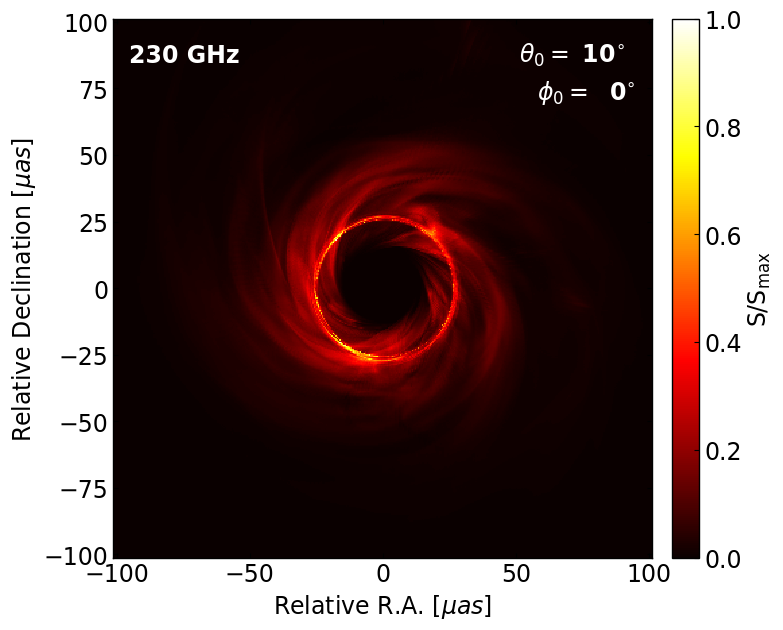

In [2]:
from pyhamrds import bhoss
import matplotlib.pyplot as plt
import os
%matplotlib inline

#datadir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh1/inc10/BHOSS_CODE"
#data = "Rh1_Rl1_sig1_i10_ph0_SgrA_Th_IMAGE_GRMHD_HAMR3D_EHT_MADS41A5_331.dat"

filename  = os.path.join(datadir, data)

figdir = os.environ['PYTHONFIG']
#bhoss.show_image(filename,ifreq=10,cmap='hot',out=os.path.join(figdir,'bhoss_img_David512_201.png'))
bhoss.show_image(filename,ifreq=0,cmap='hot') # Koushik's data - only 230GHz

# Check Average Flux

In [18]:
import os
import numpy as np

#find average flux
def bhoss_avg(Rhigh,Rlow,sig,inclination,phi0,model_name):

    if (model_name == "MADS41A5"):
        model_str = "bhoss_MA05"
        ind_start = 311
        ind_end = 410
    elif (model_name == "SANEA93M"):
        model_str = "bhoss_SA93M"
        ind_start=132
        ind_end = 231
    elif (model_name == "SANEA93"):
        model_str = "bhoss_SA93"
        ind_start=99
        ind_end = 198
    else:
        print("no model")
        return
    
    if ((Rhigh==1) | (Rhigh==5) | (Rhigh==10)):
        Rh_str = "Rh%d"%Rhigh
    else:
        print("no model")
        return
    
    if ((inclination==10) | (inclination==30) | (inclination==50) | (inclination==70) | (inclination==90)):
        inc_str = "inc%d"%inclination
    else:
        print("no model")
        return
    
    basedir = "/lustre04/scratch/astrodoo/BHOSS_EHT"
    workdir = os.path.join(basedir,model_str,Rh_str,inc_str,'BHOSS_CODE')
    print("work directory %s"%workdir)
    os.chdir(workdir)
    
    z_tot=np.zeros((ind_end-ind_start+1))
    time =np.zeros((ind_end-ind_start+1))
    ind  =np.zeros((ind_end-ind_start+1))
    
    file_path = os.getcwd()
    for image_ind in range(ind_start,ind_end+1):
        data_name="Rh%d_Rl%d_sig%d_i%d_ph%d_SgrA_Th_IMAGE_GRMHD_HAMR3D_EHT_%s_%d.dat" \
        %(Rhigh,Rlow,sig,inclination,phi0,model_name,image_ind)
        filename  = os.path.join(file_path, data_name)
        
        header_1 = np.genfromtxt(filename, max_rows = 1)
        header_2 = np.genfromtxt(filename, skip_header = 1, max_rows = 1)
        header_3 = np.genfromtxt(filename, skip_header = 2, max_rows = 1)
        M           = int(header_1[2])
        Jansky_corr          = header_2[5]
        ascii2 = np.loadtxt(filename, skiprows = 3, usecols = (0, 1, 2))
        data2=ascii2.reshape([M, M, 3])
        z    = data2[:,:,2]*Jansky_corr #convert to Jansky
        z_tot[image_ind-ind_start]=np.sum(z)
        
        ind[image_ind-ind_start] = image_ind
        time[image_ind-ind_start] = header_2[0]   # time
        
        print("%d, flux: %f at %f"%(image_ind,z_tot[image_ind-ind_start],time[image_ind-ind_start]))
        
    dscale = header_2[7]
    print(model_name+"Rh%d"%Rhigh,"Average total flux =", np.sum(z_tot)/(ind_end-ind_start+1), \
          "Jy; density_scale=", dscale)
    return (ind,time,z_tot,dscale) 

In [19]:
ind,time,z_tot,dscale = bhoss_avg(10, 1, 1, 10, 0, "MADS41A5")

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh10/inc10/BHOSS_CODE
311, flux: 2.710983 at 9003.597816
312, flux: 2.721644 at 9013.664967
313, flux: 2.725575 at 9023.730951
314, flux: 2.664600 at 9033.794470
315, flux: 2.569700 at 9043.862656
316, flux: 2.523168 at 9053.929463
317, flux: 2.477737 at 9063.995875
318, flux: 2.414912 at 9074.060236
319, flux: 2.359793 at 9084.125014
320, flux: 2.375455 at 9094.191161
321, flux: 2.427587 at 9104.258463
322, flux: 2.473275 at 9114.324296
323, flux: 2.506084 at 9124.388087
324, flux: 2.510061 at 9134.450798
325, flux: 2.486129 at 9144.515488
326, flux: 2.474071 at 9154.580838
327, flux: 2.381049 at 9164.643343
328, flux: 2.281936 at 9174.708090
329, flux: 2.169865 at 9184.774596
330, flux: 2.106848 at 9194.841238
331, flux: 2.068113 at 9204.906551
332, flux: 2.049562 at 9214.968879
333, flux: 2.041537 at 9225.032659
334, flux: 2.033646 at 9235.096933
335, flux: 2.029238 at 9243.486122
336, flux: 1.966122 at 9253.551623
337, 

In [20]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh10/inc10/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [21]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh10/inc10/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 311/410/100
average z_tot = 2.056500 Jy, the density scale = 1.100000e-18


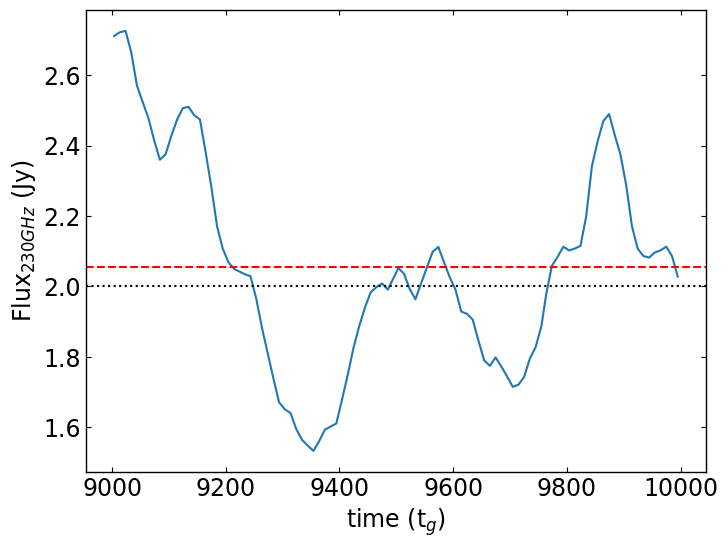

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [23]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

311:: 2.710983 Jy at 9003.597816
312:: 2.721644 Jy at 9013.664967
313:: 2.725575 Jy at 9023.730951
314:: 2.664600 Jy at 9033.794470
315:: 2.569700 Jy at 9043.862656
316:: 2.523168 Jy at 9053.929463
317:: 2.477737 Jy at 9063.995875
318:: 2.414912 Jy at 9074.060236
319:: 2.359793 Jy at 9084.125014
320:: 2.375455 Jy at 9094.191161
321:: 2.427587 Jy at 9104.258463
322:: 2.473275 Jy at 9114.324296
323:: 2.506084 Jy at 9124.388087
324:: 2.510061 Jy at 9134.450798
325:: 2.486129 Jy at 9144.515488
326:: 2.474071 Jy at 9154.580838
327:: 2.381049 Jy at 9164.643343
328:: 2.281936 Jy at 9174.708090
329:: 2.169865 Jy at 9184.774596
330:: 2.106848 Jy at 9194.841238
331:: 2.068113 Jy at 9204.906551
332:: 2.049562 Jy at 9214.968879
333:: 2.041537 Jy at 9225.032659
334:: 2.033646 Jy at 9235.096933
335:: 2.029238 Jy at 9243.486122
336:: 1.966122 Jy at 9253.551623
337:: 1.883144 Jy at 9263.615142
338:: 1.811443 Jy at 9273.678488
339:: 1.739050 Jy at 9283.741347
340:: 1.671195 Jy at 9293.805262
341:: 1.65

In [24]:
ind,time,z_tot,dscale = bhoss_avg(10, 1, 1, 30, 0, "MADS41A5")

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh10/inc30/BHOSS_CODE
311, flux: 2.543169 at 9003.597816
312, flux: 2.543147 at 9013.664967
313, flux: 2.529581 at 9023.730951
314, flux: 2.458140 at 9033.794470
315, flux: 2.358580 at 9043.862656
316, flux: 2.299810 at 9053.929463
317, flux: 2.243781 at 9063.995875
318, flux: 2.192638 at 9074.060236
319, flux: 2.141425 at 9084.125014
320, flux: 2.163593 at 9094.191161
321, flux: 2.200610 at 9104.258463
322, flux: 2.233314 at 9114.324296
323, flux: 2.277947 at 9124.388087
324, flux: 2.297477 at 9134.450798
325, flux: 2.298732 at 9144.515488
326, flux: 2.321158 at 9154.580838
327, flux: 2.248860 at 9164.643343
328, flux: 2.170669 at 9174.708090
329, flux: 2.078592 at 9184.774596
330, flux: 2.027327 at 9194.841238
331, flux: 1.991310 at 9204.906551
332, flux: 1.989855 at 9214.968879
333, flux: 2.001576 at 9225.032659
334, flux: 2.007526 at 9235.096933
335, flux: 2.010618 at 9243.486122
336, flux: 1.946285 at 9253.551623
337, 

In [25]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh10/inc30/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [26]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh10/inc30/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 311/410/100
average z_tot = 2.006489 Jy, the density scale = 1.070000e-18


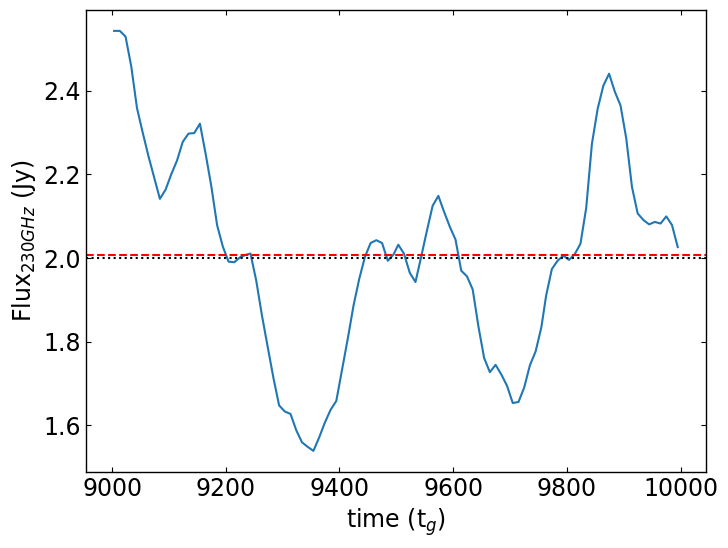

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [28]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

311:: 2.543169 Jy at 9003.597816
312:: 2.543147 Jy at 9013.664967
313:: 2.529581 Jy at 9023.730951
314:: 2.458140 Jy at 9033.794470
315:: 2.358580 Jy at 9043.862656
316:: 2.299810 Jy at 9053.929463
317:: 2.243781 Jy at 9063.995875
318:: 2.192638 Jy at 9074.060236
319:: 2.141425 Jy at 9084.125014
320:: 2.163593 Jy at 9094.191161
321:: 2.200610 Jy at 9104.258463
322:: 2.233314 Jy at 9114.324296
323:: 2.277947 Jy at 9124.388087
324:: 2.297477 Jy at 9134.450798
325:: 2.298732 Jy at 9144.515488
326:: 2.321158 Jy at 9154.580838
327:: 2.248860 Jy at 9164.643343
328:: 2.170669 Jy at 9174.708090
329:: 2.078592 Jy at 9184.774596
330:: 2.027327 Jy at 9194.841238
331:: 1.991310 Jy at 9204.906551
332:: 1.989855 Jy at 9214.968879
333:: 2.001576 Jy at 9225.032659
334:: 2.007526 Jy at 9235.096933
335:: 2.010618 Jy at 9243.486122
336:: 1.946285 Jy at 9253.551623
337:: 1.862811 Jy at 9263.615142
338:: 1.787967 Jy at 9273.678488
339:: 1.713950 Jy at 9283.741347
340:: 1.647488 Jy at 9293.805262
341:: 1.63

In [29]:
ind,time,z_tot,dscale = bhoss_avg(10, 1, 1, 50, 0, "MADS41A5")

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh10/inc50/BHOSS_CODE
311, flux: 2.441485 at 9003.597816
312, flux: 2.446094 at 9013.664967
313, flux: 2.430925 at 9023.730951
314, flux: 2.351299 at 9033.794470
315, flux: 2.247379 at 9043.862656
316, flux: 2.184501 at 9053.929463
317, flux: 2.121789 at 9063.995875
318, flux: 2.085047 at 9074.060236
319, flux: 2.048358 at 9084.125014
320, flux: 2.084850 at 9094.191161
321, flux: 2.112133 at 9104.258463
322, flux: 2.134530 at 9114.324296
323, flux: 2.197803 at 9124.388087
324, flux: 2.229561 at 9134.450798
325, flux: 2.231250 at 9144.515488
326, flux: 2.265444 at 9154.580838
327, flux: 2.199258 at 9164.643343
328, flux: 2.139120 at 9174.708090
329, flux: 2.062363 at 9184.774596
330, flux: 2.011527 at 9194.841238
331, flux: 1.981931 at 9204.906551
332, flux: 1.986119 at 9214.968879
333, flux: 2.005317 at 9225.032659
334, flux: 2.029143 at 9235.096933
335, flux: 2.046504 at 9243.486122
336, flux: 1.973934 at 9253.551623
337, 

In [30]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh10/inc50/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [31]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh10/inc50/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 311/410/100
average z_tot = 2.020080 Jy, the density scale = 1.030000e-18


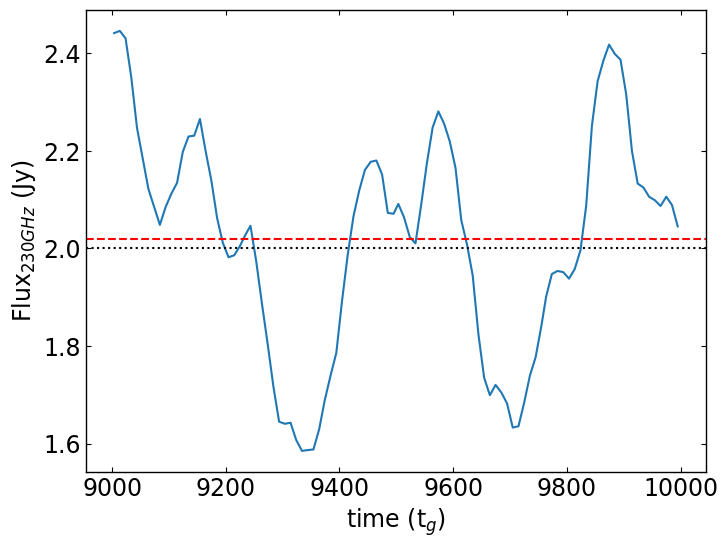

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [33]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

311:: 2.441485 Jy at 9003.597816
312:: 2.446094 Jy at 9013.664967
313:: 2.430925 Jy at 9023.730951
314:: 2.351299 Jy at 9033.794470
315:: 2.247379 Jy at 9043.862656
316:: 2.184501 Jy at 9053.929463
317:: 2.121789 Jy at 9063.995875
318:: 2.085047 Jy at 9074.060236
319:: 2.048358 Jy at 9084.125014
320:: 2.084850 Jy at 9094.191161
321:: 2.112133 Jy at 9104.258463
322:: 2.134530 Jy at 9114.324296
323:: 2.197803 Jy at 9124.388087
324:: 2.229561 Jy at 9134.450798
325:: 2.231250 Jy at 9144.515488
326:: 2.265444 Jy at 9154.580838
327:: 2.199258 Jy at 9164.643343
328:: 2.139120 Jy at 9174.708090
329:: 2.062363 Jy at 9184.774596
330:: 2.011527 Jy at 9194.841238
331:: 1.981931 Jy at 9204.906551
332:: 1.986119 Jy at 9214.968879
333:: 2.005317 Jy at 9225.032659
334:: 2.029143 Jy at 9235.096933
335:: 2.046504 Jy at 9243.486122
336:: 1.973934 Jy at 9253.551623
337:: 1.887055 Jy at 9263.615142
338:: 1.804548 Jy at 9273.678488
339:: 1.717399 Jy at 9283.741347
340:: 1.644893 Jy at 9293.805262
341:: 1.64

In [34]:
ind,time,z_tot,dscale = bhoss_avg(10, 1, 1, 70, 0, "MADS41A5")

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh10/inc70/BHOSS_CODE
311, flux: 2.437120 at 9003.597816
312, flux: 2.467030 at 9013.664967
313, flux: 2.439327 at 9023.730951
314, flux: 2.352344 at 9033.794470
315, flux: 2.260924 at 9043.862656
316, flux: 2.194926 at 9053.929463
317, flux: 2.134993 at 9063.995875
318, flux: 2.110776 at 9074.060236
319, flux: 2.098587 at 9084.125014
320, flux: 2.179339 at 9094.191161
321, flux: 2.235350 at 9104.258463
322, flux: 2.266727 at 9114.324296
323, flux: 2.387327 at 9124.388087
324, flux: 2.459144 at 9134.450798
325, flux: 2.388447 at 9144.515488
326, flux: 2.380213 at 9154.580838
327, flux: 2.283819 at 9164.643343
328, flux: 2.253925 at 9174.708090
329, flux: 2.181143 at 9184.774596
330, flux: 2.143656 at 9194.841238
331, flux: 2.113702 at 9204.906551
332, flux: 2.066493 at 9214.968879
333, flux: 2.049881 at 9225.032659
334, flux: 2.087965 at 9235.096933
335, flux: 2.107073 at 9243.486122
336, flux: 2.015737 at 9253.551623
337, 

In [35]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh10/inc70/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [36]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh10/inc70/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 311/410/100
average z_tot = 2.117665 Jy, the density scale = 9.800000e-19


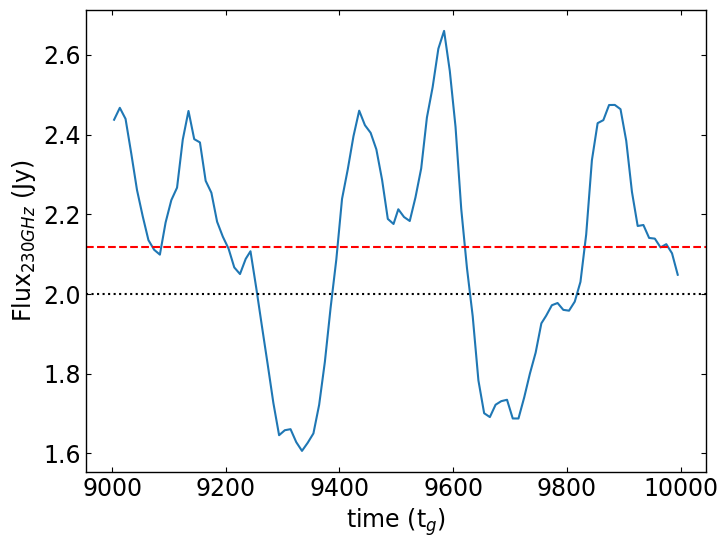

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [38]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

311:: 2.437120 Jy at 9003.597816
312:: 2.467030 Jy at 9013.664967
313:: 2.439327 Jy at 9023.730951
314:: 2.352344 Jy at 9033.794470
315:: 2.260924 Jy at 9043.862656
316:: 2.194926 Jy at 9053.929463
317:: 2.134993 Jy at 9063.995875
318:: 2.110776 Jy at 9074.060236
319:: 2.098587 Jy at 9084.125014
320:: 2.179339 Jy at 9094.191161
321:: 2.235350 Jy at 9104.258463
322:: 2.266727 Jy at 9114.324296
323:: 2.387327 Jy at 9124.388087
324:: 2.459144 Jy at 9134.450798
325:: 2.388447 Jy at 9144.515488
326:: 2.380213 Jy at 9154.580838
327:: 2.283819 Jy at 9164.643343
328:: 2.253925 Jy at 9174.708090
329:: 2.181143 Jy at 9184.774596
330:: 2.143656 Jy at 9194.841238
331:: 2.113702 Jy at 9204.906551
332:: 2.066493 Jy at 9214.968879
333:: 2.049881 Jy at 9225.032659
334:: 2.087965 Jy at 9235.096933
335:: 2.107073 Jy at 9243.486122
336:: 2.015737 Jy at 9253.551623
337:: 1.918896 Jy at 9263.615142
338:: 1.823817 Jy at 9273.678488
339:: 1.726342 Jy at 9283.741347
340:: 1.645454 Jy at 9293.805262
341:: 1.65

In [39]:
ind,time,z_tot,dscale = bhoss_avg(10, 1, 1, 90, 0, "MADS41A5")

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh10/inc90/BHOSS_CODE
311, flux: 2.375284 at 9003.597816
312, flux: 2.395863 at 9013.664967
313, flux: 2.441308 at 9023.730951
314, flux: 2.446640 at 9033.794470
315, flux: 2.397129 at 9043.862656
316, flux: 2.274339 at 9053.929463
317, flux: 2.125843 at 9063.995875
318, flux: 2.087487 at 9074.060236
319, flux: 2.131471 at 9084.125014
320, flux: 2.257266 at 9094.191161
321, flux: 2.334255 at 9104.258463
322, flux: 2.335996 at 9114.324296
323, flux: 2.470265 at 9124.388087
324, flux: 2.504982 at 9134.450798
325, flux: 2.458027 at 9144.515488
326, flux: 2.477536 at 9154.580838
327, flux: 2.397962 at 9164.643343
328, flux: 2.419622 at 9174.708090
329, flux: 2.326838 at 9184.774596
330, flux: 2.177456 at 9194.841238
331, flux: 2.116469 at 9204.906551
332, flux: 2.116488 at 9214.968879
333, flux: 2.072661 at 9225.032659
334, flux: 2.129663 at 9235.096933
335, flux: 2.119973 at 9243.486122
336, flux: 2.059131 at 9253.551623
337, 

In [40]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh10/inc90/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [41]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh10/inc90/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 311/410/100
average z_tot = 2.173063 Jy, the density scale = 9.400000e-19


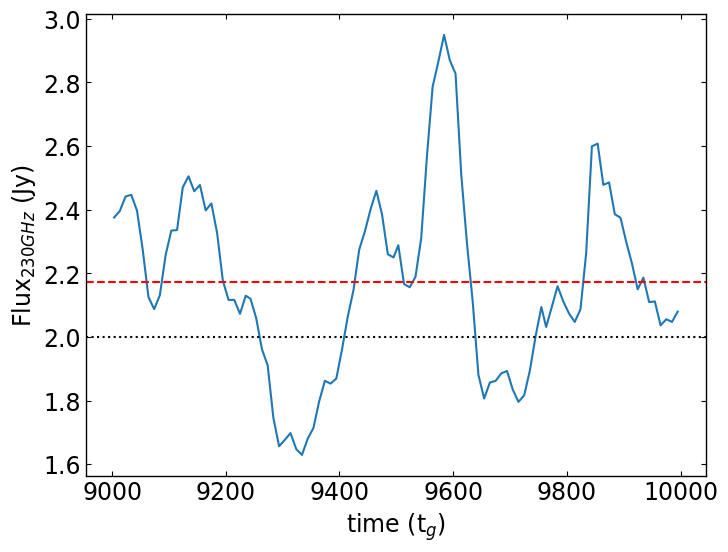

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [43]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

311:: 2.375284 Jy at 9003.597816
312:: 2.395863 Jy at 9013.664967
313:: 2.441308 Jy at 9023.730951
314:: 2.446640 Jy at 9033.794470
315:: 2.397129 Jy at 9043.862656
316:: 2.274339 Jy at 9053.929463
317:: 2.125843 Jy at 9063.995875
318:: 2.087487 Jy at 9074.060236
319:: 2.131471 Jy at 9084.125014
320:: 2.257266 Jy at 9094.191161
321:: 2.334255 Jy at 9104.258463
322:: 2.335996 Jy at 9114.324296
323:: 2.470265 Jy at 9124.388087
324:: 2.504982 Jy at 9134.450798
325:: 2.458027 Jy at 9144.515488
326:: 2.477536 Jy at 9154.580838
327:: 2.397962 Jy at 9164.643343
328:: 2.419622 Jy at 9174.708090
329:: 2.326838 Jy at 9184.774596
330:: 2.177456 Jy at 9194.841238
331:: 2.116469 Jy at 9204.906551
332:: 2.116488 Jy at 9214.968879
333:: 2.072661 Jy at 9225.032659
334:: 2.129663 Jy at 9235.096933
335:: 2.119973 Jy at 9243.486122
336:: 2.059131 Jy at 9253.551623
337:: 1.961496 Jy at 9263.615142
338:: 1.910857 Jy at 9273.678488
339:: 1.746040 Jy at 9283.741347
340:: 1.656506 Jy at 9293.805262
341:: 1.67